# (3.12) Exercise:

1. Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set)
2. Perform a similar alanlaysis as above on this dataset with the following sections:
* High level statistics of the dataset: number of points, numer of features, number of classes, data-points per class.
* Explain our objective. 
* Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification.
* Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.
* Write your observations in english as crisply and unambigously as possible. Always quantify your results.

In [1]:
# For suppress the warnings by python code
import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# importing data from csv file to pandas dataframe object
haberman = pd.read_csv('haberman.csv')

In [4]:
# to find shape of our dataframe
haberman.shape

(305, 4)

So number of rows or records in our dataset is 305 and number of features is 4

In [5]:
# lets see some top rows of our dataset
haberman.head(5)

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [6]:
haberman.columns

Index(['30', '64', '1', '1.1'], dtype='object')

Since columns names are some random objects we have to change it to names of each coloums,
by kaggle page of dataset the features are ['age', 'op_year', 'axil_nodes', 'surv_status'].
We can do this by df.rename

In [7]:
haberman = haberman.rename(index = str, columns={"30": "age", "64": "op_year", "1" : "axil_nodes", "1.1" : "surv_status"})
haberman.columns

Index(['age', 'op_year', 'axil_nodes', 'surv_status'], dtype='object')

In [8]:
haberman.head(5)

,age,op_year,axil_nodes,surv_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [9]:
haberman.describe()

,age,op_year,axil_nodes,surv_status
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


## Our objective is to classify a given patient in the one class out of given classes in surv_status. According to kaggle website: there are two classes in surv_status
### 1 = the patient survived 5 years or longer 
### 2 = the patient died within 5 year

In [10]:
# Find number of number of classes and data points per class by given data
haberman["surv_status"].value_counts()

1    224
2     81
Name: surv_status, dtype: int64

So we can see that there are two classes in our dataset named as 1 and 2. Where 1 means the patient survived 5 years or longer and 2 means the patient died within five years.
The class 1 contain 224 records and class 2 contain 81 records so we can say that this is imbalanced dataset.
Also The good number of people are servived after treatment so that's great.

# Univaraite analysis

In this analysis we will find out out of age, op_year, axil_nodes which one feature is more important to classify a given patient in one class. Start with drawing histogram and PDF for each features

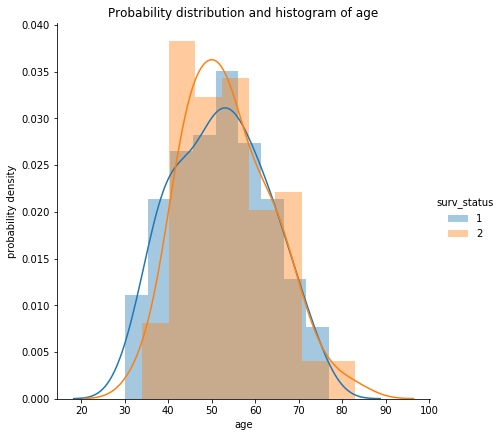

In [11]:
sns.FacetGrid(haberman, hue="surv_status", height=6) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.title("Probability distribution and histogram of age")
plt.ylabel("probability density")
plt.show()

##### Observation
By above plot we can see that when age of patient is 44 to 60 then the chances of servival of that patient is low but for age less than 40 patient is more likely to get servived.

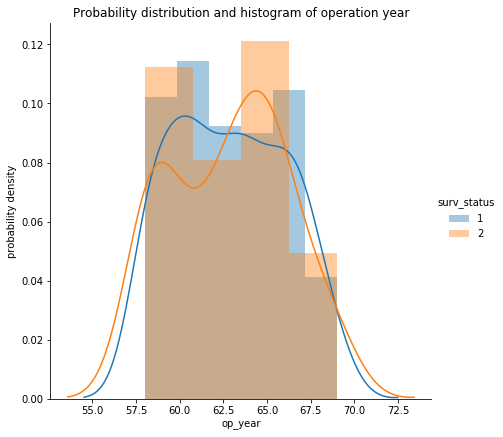

In [12]:
sns.FacetGrid(haberman, hue="surv_status", height=6) \
   .map(sns.distplot, "op_year") \
   .add_legend();
plt.title("Probability distribution and histogram of operation year")
plt.ylabel("probability density")
plt.show();

Above plot tells us that if op_year is from 58.5 to 63 then chances of servival of patient is more but after age 63 the chances of servival is low. 

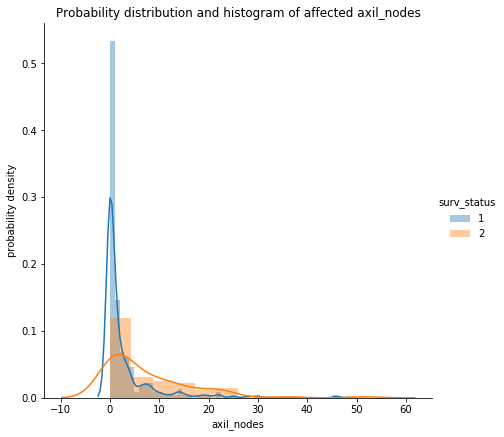

In [13]:
sns.FacetGrid(haberman, hue="surv_status", height=6) \
   .map(sns.distplot, "axil_nodes") \
   .add_legend();
plt.title("Probability distribution and histogram of affected axil_nodes")
plt.ylabel("probability density")
plt.show();

#### Observations
So when number of axil_nodes is less than 3 then chances of servival is very high. But when axil_nodes greater than 3 the chances for non servival is more compared to servival.
### By above plots we conclude that any one feature can not classify between two classes but if we have to choose one best feature out of three we choose axil_nodes because area in pdf's of axil_nodes have minimum overlap. if axil_nodes value is less than 3(or that intersection point) then patient is more likely to get servived.

In [14]:
# Lets draw CDFs to find how much percetile of data points are less than a perticular value for each feature
haberman_servived = haberman.loc[haberman["surv_status"] == 1]
haberman_non_servived = haberman.loc[haberman["surv_status"] == 2]

The chances of servival is high at age below 44 but after that it roughly get decreased. Overall chances of servial between age 50 to 61 is maximum

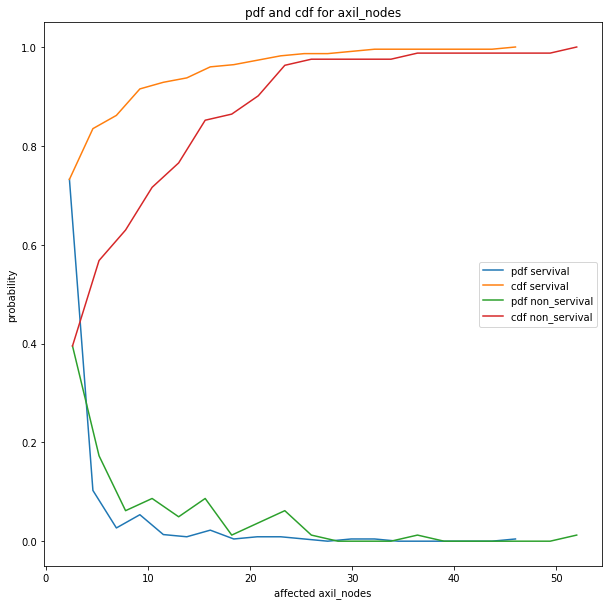

In [16]:
# Plots of CDF of axil_nodes for both classes.

# For servived
counts, bin_edges = np.histogram(haberman_servived['axil_nodes'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.figure(figsize=(10,10))
plt.plot(bin_edges[1:], pdf, label='pdf servival')
plt.plot(bin_edges[1:], cdf, label='cdf servival')


# For Non servived
counts, bin_edges = np.histogram(haberman_non_servived['axil_nodes'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf non_servival')
plt.plot(bin_edges[1:], cdf, label='cdf non_servival')
plt.xlabel("affected axil_nodes")
plt.ylabel("probability")
plt.title("pdf and cdf for axil_nodes")
plt.legend()

plt.show()

#### Conclusion
More than 80 percent of servived patients have less than 3 affective axil_nodes.
50 percent of patients who not servived has less than 3 affective axil_nodes.
There is approximately 0 percent chance of servival of a patient if he has greater than 20 affective axil_nodes.
For more than 3 affective axil_nodes chances of decreased rapidly.

### Creating boxplots

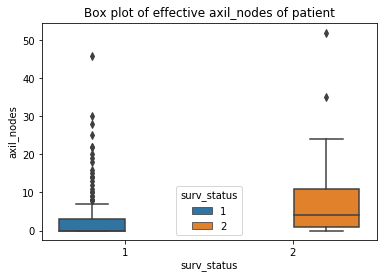

In [17]:
sns.boxplot(x='surv_status',y='axil_nodes', data=haberman, hue="surv_status")
plt.title("Box plot of effective axil_nodes of patient")
plt.show()

#### Observation
If we choose threshold value of axil_nodes 3 then we misclassify the 50% who not servived but we correctly classify
75% - 80% of people who gets servived.

### voilin plots

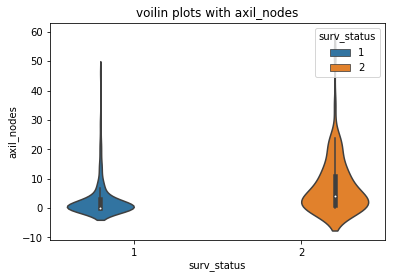

In [18]:
sns.violinplot(x = "surv_status", y="axil_nodes", data=haberman, size=8, hue="surv_status")
plt.title("voilin plots with axil_nodes")
plt.show()


### Observations from univariate analysis

By above voilin plots we can see pdf and box plots in the same window. median is greater for non servival class in case of axil_node feature. Also overlap is minimum in case of using feature axil_nodes. If we choose 75th percentile value of axil_nodes for servival class we can classify these two classes in best possible way.
##### The 75th percentile value is 3 for axil_nodes .

## Bi-variate analysis

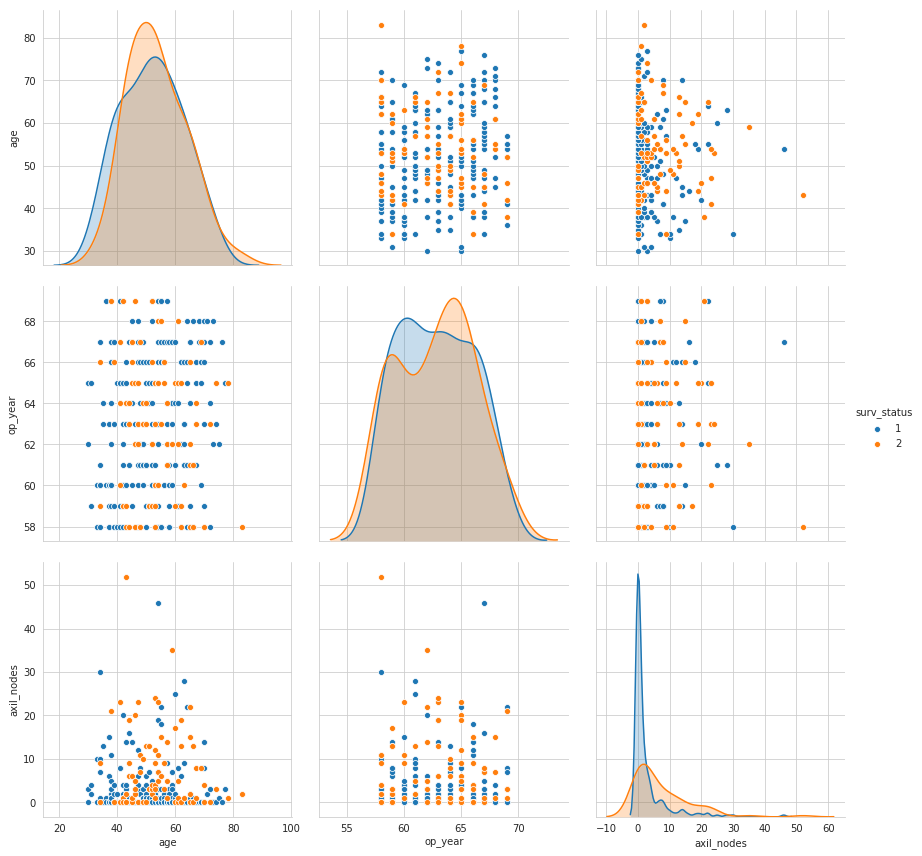

In [19]:
# Drawing pair plots
plt.close()
sns.set_style("whitegrid")
sns.pairplot(haberman, vars=['age','op_year','axil_nodes'], hue="surv_status", height=4)
plt.show()

#### Observations
If we have to choose 2 features out of 3 to seprate two classes we choose operational year along with axil_nodes. Since by using these two features we seprate two classes in best possible way.

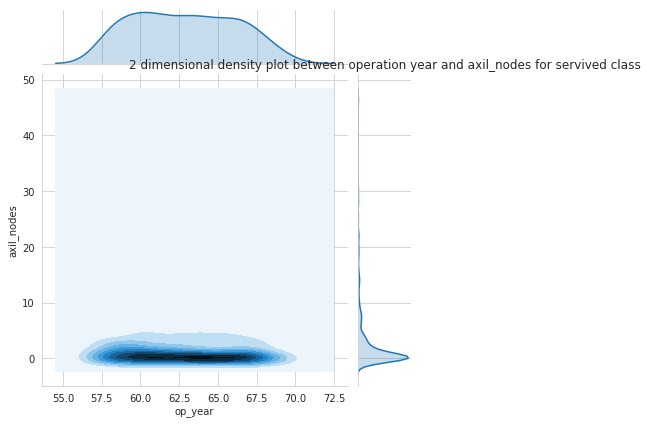

In [20]:
#Drawing 2D Density plot
sns.jointplot(x="op_year", y="axil_nodes", data=haberman_servived, kind="kde")
plt.title("2 dimensional density plot between operation year and axil_nodes for servived class")
plt.show()


For op_year before 63 and after 66 and for number of affective axil nodes less than 3 the patient is more likely to servive more than 5 years after taking surgery. 

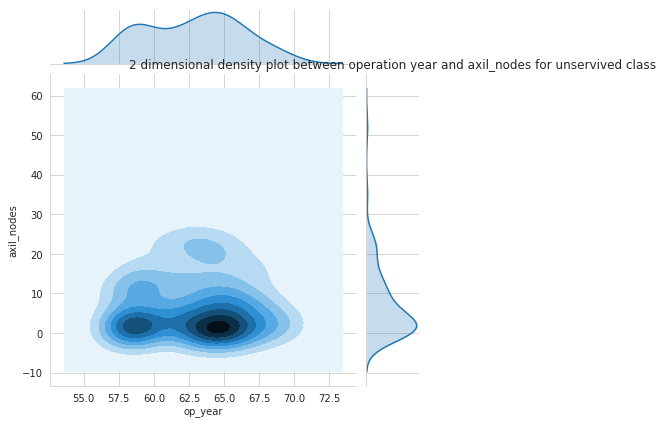

In [21]:
sns.jointplot(x="op_year", y="axil_nodes", data=haberman_non_servived, kind="kde")
plt.title("2 dimensional density plot between operation year and axil_nodes for unservived class")
plt.show()

For op_year between 63 to 66 and number of axil_nodes greater than 3 the patient are more likely not to servived more than 5 years.